In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel('Data_train.xlsx')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
df.shape

(6019, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


There are 3 numeric type independent variables:
- Year
- Kilometers_Driven
- Seats
<br>
There are 8 object type independent variables. 
There are 3 ordinal type independent variables:
- year
- seats
- owner_type


In [6]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [7]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Null values are present only in columns 
- Mileage
- Engine
- Power 
- Seats

In [8]:
df['Location'].unique().tolist()

['Mumbai',
 'Pune',
 'Chennai',
 'Coimbatore',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Delhi',
 'Bangalore',
 'Ahmedabad']

In [9]:
df['Fuel_Type'].unique().tolist()

['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']

In [10]:
df['Transmission'].unique().tolist()

['Manual', 'Automatic']

In [11]:
df['Owner_Type'].unique().tolist()


['First', 'Second', 'Fourth & Above', 'Third']

In [12]:
df['Seats'].unique().tolist()

[5.0, 7.0, 8.0, 4.0, 6.0, 2.0, nan, 10.0, 9.0, 0.0]

#### Columns like Mileage, Engine and Power are numeric data but are of object data type due to the units being mentioned along with them.The removal of units is necessary to perform numeric functions on them.

In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [14]:
df[df.Mileage.isnull()==True]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [15]:
df[(df.Engine.isnull()==True)&(df.Power.isnull()==True)&(df.Seats.isnull()==True)].shape

(36, 12)

Thus for every row where we have null value for Engine capacity, we also have null value for Power and number of Seats

In [16]:
df[(df.Engine.isnull()!=True)&(df.Power.isnull()!=True)&(df.Seats.isnull()==True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75


We can see that there are null values present in the Power column that are not being considered as null values

### Outliers

#### Kilometers_Driven

In [18]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [19]:
print("Range of distance is from {} to {}, value is {}".format(df['Kilometers_Driven'].min(),df['Kilometers_Driven'].max(),df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min())/10)
print("The median value of the score is ", np.median(df['Kilometers_Driven']))

Range of distance is from 171 to 6500000, value is 6499829
Bin is 10, so each bar corresponds to the value of: 649982.9
The median value of the score is  53000.0


In [20]:
#Standardisation of values
from sklearn.preprocessing import StandardScaler

In [21]:
scaling=StandardScaler()
df.Kilometers_Driven=scaling.fit_transform(df[['Kilometers_Driven']])

In [22]:
df.Kilometers_Driven.describe()

count    6.019000e+03
mean    -1.045388e-17
std      1.000083e+00
min     -6.417551e-01
25%     -2.710721e-01
50%     -6.287860e-02
75%      1.562724e-01
max      7.058046e+01
Name: Kilometers_Driven, dtype: float64

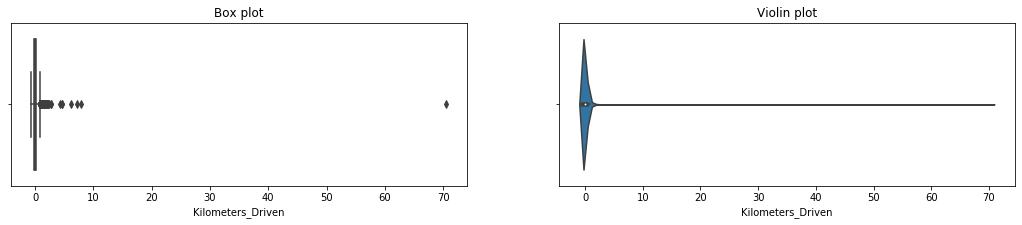

In [23]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(df['Kilometers_Driven'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(df['Kilometers_Driven'])
plt.title('Violin plot')
plt.show()

In [24]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.145315,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.194369,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,-0.139581,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.309678,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.197985,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [25]:
print("Range of distance is from {} to {}, value is {}".format(df['Kilometers_Driven'].min(),df['Kilometers_Driven'].max(),df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Kilometers_Driven'].max()-df['Kilometers_Driven'].min())/10)
print("The median value of the score is ", np.median(df['Kilometers_Driven']))

Range of distance is from -0.6417551056083325 to 70.58045810025035, value is 71.22221320585868
Bin is 10, so each bar corresponds to the value of: 7.122221320585868
The median value of the score is  -0.06287859955681817


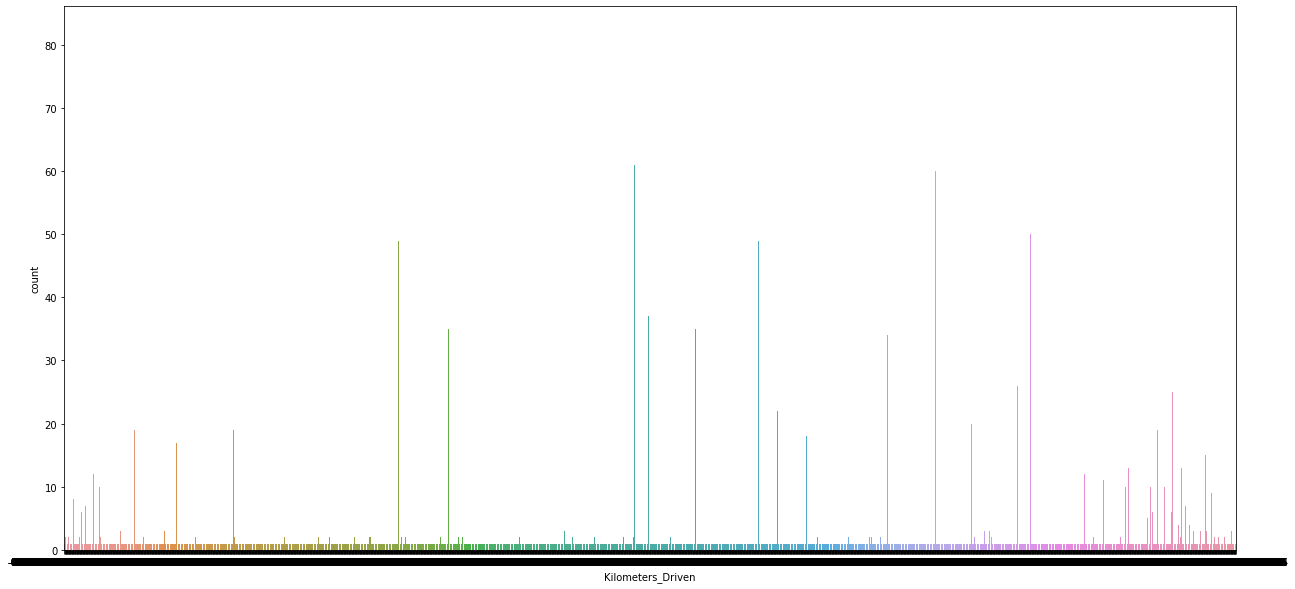

In [26]:
plt.figure(figsize=(21,10))
sns.countplot(df['Kilometers_Driven'])
plt.show()

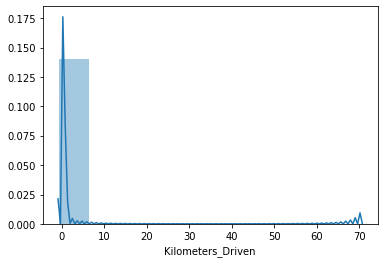

In [27]:
sns.distplot(df['Kilometers_Driven'], bins=10, kde=True )

Most of the values lie between -0.6 to about 8. the values near 70 can be considered as outliers.

In [28]:
print("Range of distance is from {} to {}, value is {}".format(df['Year'].min(),df['Year'].max(),df['Year'].max()-df['Year'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Year'].max()-df['Year'].min())/10)
print("The median value of the score is ", np.median(df['Year']))

Range of distance is from 1998 to 2019, value is 21
Bin is 10, so each bar corresponds to the value of: 2.1
The median value of the score is  2014.0


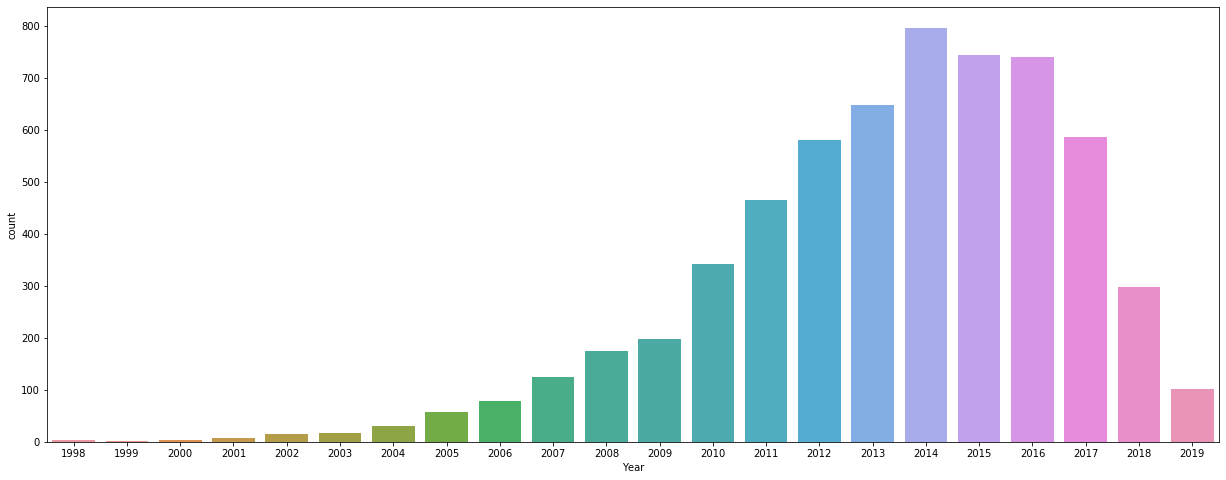

In [29]:
plt.figure(figsize=(21,8))
sns.countplot(df['Year'])
plt.show()

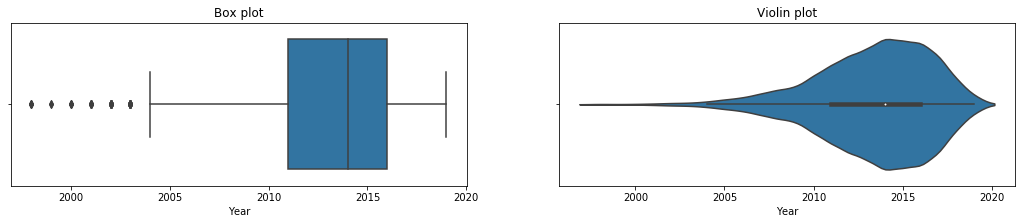

In [30]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(df['Year'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(df['Year'])
plt.title('Violin plot')
plt.show()

In [31]:
print("Range of distance is from {} to {}, value is {}".format(df['Seats'].min(),df['Seats'].max(),df['Seats'].max()-df['Seats'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Seats'].max()-df['Seats'].min())/10)
print("The median value of the score is ", np.median(df['Seats']))

Range of distance is from 0.0 to 10.0, value is 10.0
Bin is 10, so each bar corresponds to the value of: 1.0
The median value of the score is  nan


C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


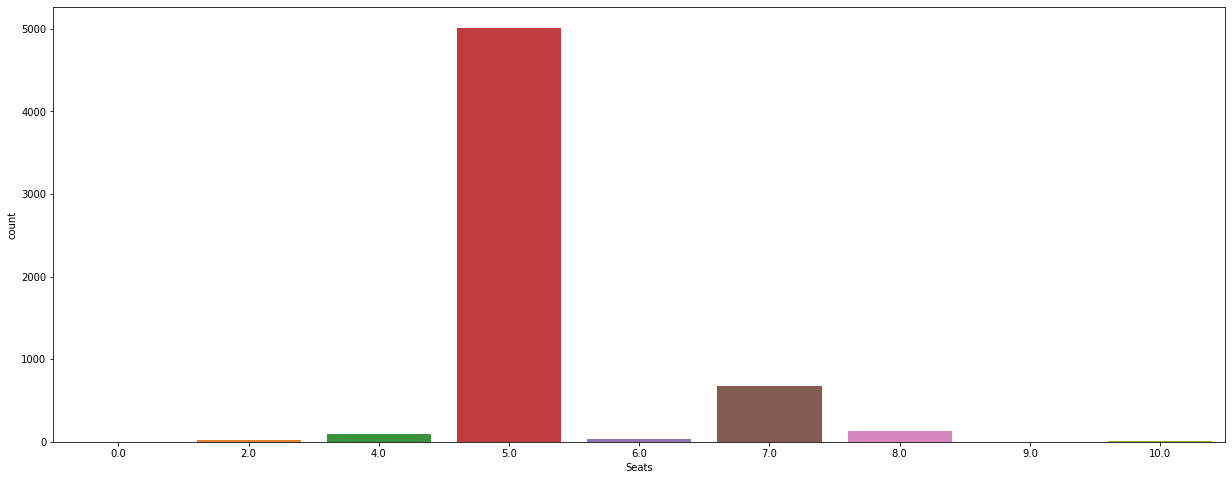

In [32]:
plt.figure(figsize=(21,8))
sns.countplot(df['Seats'])
plt.show()

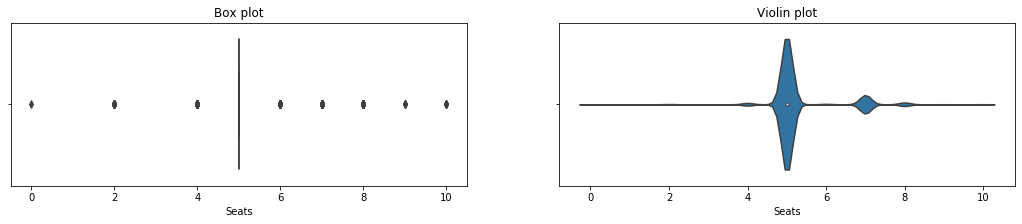

In [33]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(df['Seats'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(df['Seats']) 
plt.title('Violin plot')
plt.show()

Maximum number of cars, about 5000 of them, are 5 seated vehicles

In [34]:
man=np.mean(df.Seats)

In [35]:
df["Seats"].fillna(man,inplace=True)
df.Seats.unique()

array([ 5.        ,  7.        ,  8.        ,  4.        ,  6.        ,
        2.        ,  5.27873515, 10.        ,  9.        ,  0.        ])

In [36]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

In [37]:
print("Range of distance is from {} to {}, value is {}".format(df['Seats'].min(),df['Seats'].max(),df['Seats'].max()-df['Seats'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(df['Seats'].max()-df['Seats'].min())/10)
print("The median value of the score is ", np.median(df['Seats']))

Range of distance is from 0.0 to 10.0, value is 10.0
Bin is 10, so each bar corresponds to the value of: 1.0
The median value of the score is  5.0


Text(0.5, 1.0, 'Box plot')

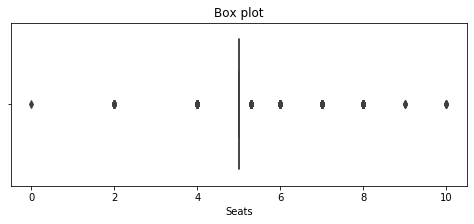

In [38]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(df['Seats'])
plt.title('Box plot')

In [39]:
df['Power'] = df['Power'].str.replace('[bhp]',' ')
df['Engine'] = df['Engine'].str.replace('[CC]',' ')
df['Mileage'] = df['Mileage'].str.replace('[kmpl,km/kg]',' ')

In [40]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.145315,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.194369,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,-0.139581,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.309678,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.197985,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


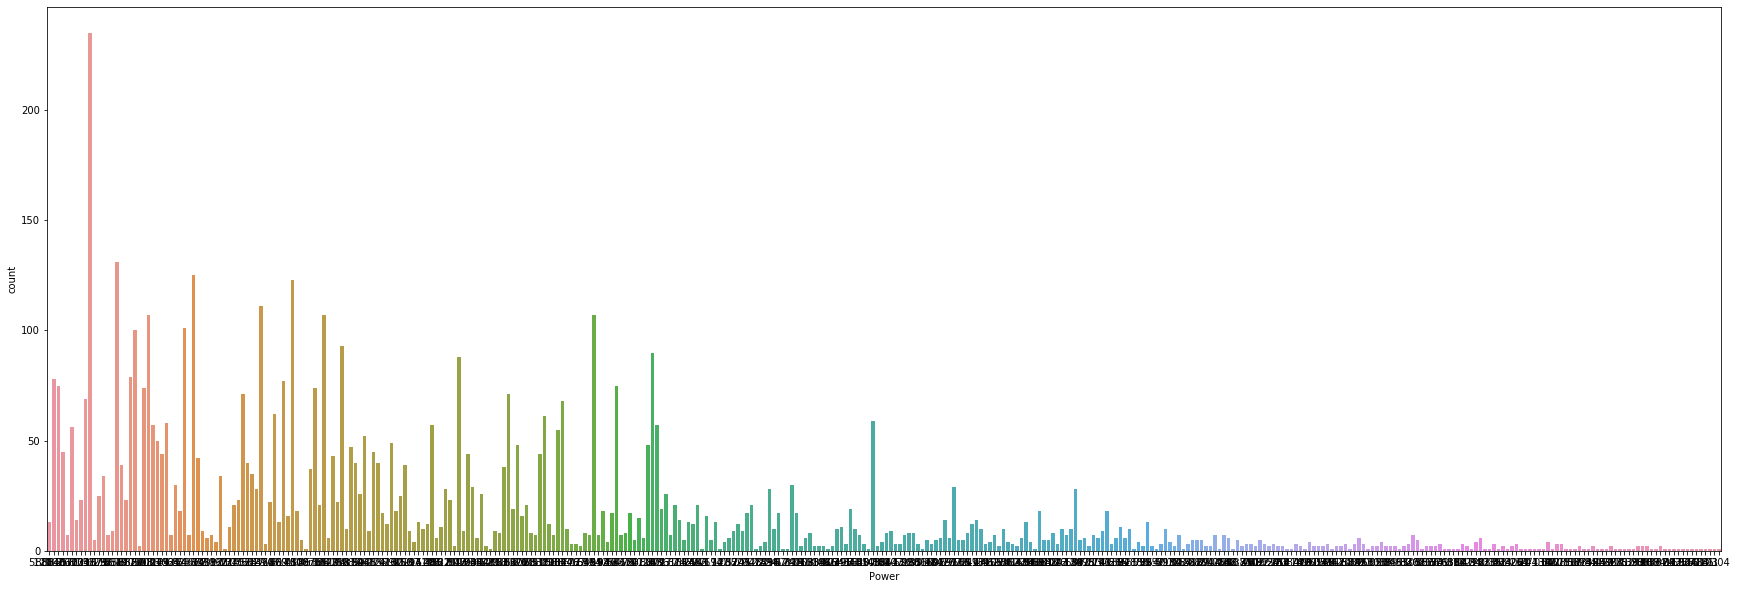

In [41]:
plt.figure(figsize=(30,10))
sns.countplot(df['Power'])
plt.show()

#### Imputing of null values: 

In [42]:
df["Engine"]=df["Engine"].astype('float')

In [43]:
mean=df.Engine.mean()
df["Engine"].fillna(mean,inplace=True)
df.Engine.isnull().sum()

0

In [44]:
df["Mileage"]=df["Mileage"].astype('float')

mean=df.Mileage.mean()
df["Mileage"].fillna(mean,inplace=True)
df.Mileage.isnull().sum()

0

In [45]:
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [46]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [47]:
mean=df.Power.mean()
df["Power"].fillna(mean,inplace=True)
df.Mileage.isnull().sum()

0

In [48]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,-1.045388e-17,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,1.000083e+00,4.581528,599.553865,53.231019,0.806012,11.187917
min,1998.000000,-6.417551e-01,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,-2.710721e-01,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,-6.287860e-02,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,1.562724e-01,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,7.058046e+01,33.540000,5998.000000,560.000000,10.000000,160.000000


Text(0.5, 1.0, 'Box plot')

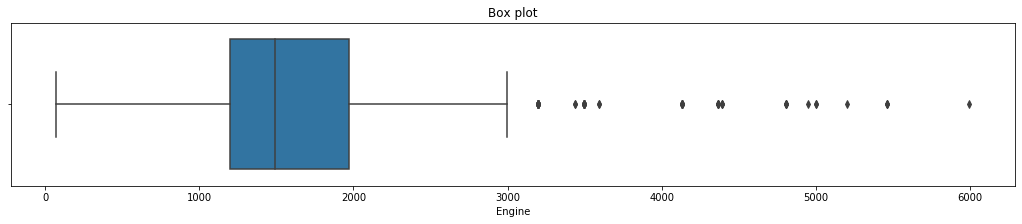

In [49]:
plt.figure(figsize=(18,3))
plt.subplot(1, 1, 1)
sns.boxplot(df['Engine'])
plt.title('Box plot')

Text(0.5, 1.0, 'Box plot')

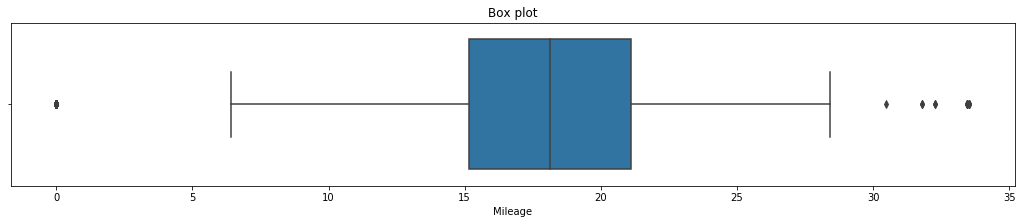

In [50]:
plt.figure(figsize=(18,3))
plt.subplot(1, 1, 1)
sns.boxplot(df['Mileage'])
plt.title('Box plot')

Text(0.5, 1.0, 'Box plot')

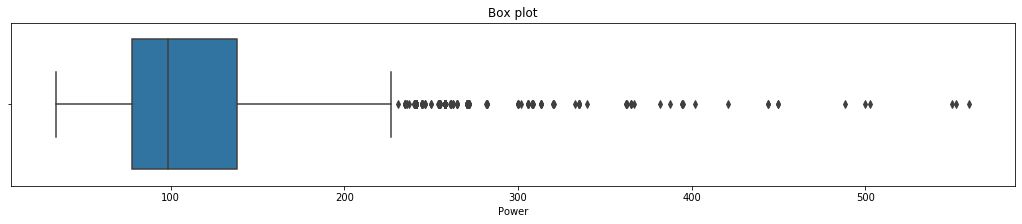

In [51]:
plt.figure(figsize=(18,3))
plt.subplot(1, 1, 1)
sns.boxplot(df['Power'])
plt.title('Box plot')

In [52]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.145315,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.194369,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,-0.139581,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.309678,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.197985,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [53]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [54]:
#Numeric value to ordinal data
df.replace(to_replace=['First','Second','Fourth & Above','Third'],value=['4','3','1','2'],inplace=True)
df["Owner_Type"]=df["Owner_Type"].astype('float')

df.replace(to_replace=['Manual','Automatic'],value=['0','1'],inplace=True)
df["Transmission"]=df["Transmission"].astype('int')

In [55]:
dum_df = pd.get_dummies(df, columns=["Fuel_Type"], prefix=["Type_is"] )

In [56]:
dum_df.head()

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Type_is_CNG,Type_is_Diesel,Type_is_Electric,Type_is_LPG,Type_is_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.145315,0,4.0,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.194369,0,4.0,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,-0.139581,0,4.0,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,0.309678,0,4.0,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.197985,1,3.0,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0


In [57]:
df.Location.nunique()

11

In [58]:
dum_df = pd.get_dummies(dum_df, columns=["Location"], prefix=["Type_is"] )
dum_df.head()

,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Type_is_Bangalore,Type_is_Chennai,Type_is_Coimbatore,Type_is_Delhi,Type_is_Hyderabad,Type_is_Jaipur,Type_is_Kochi,Type_is_Kolkata,Type_is_Mumbai,Type_is_Pune
0,Maruti Wagon R LXI CNG,2010,0.145315,0,4.0,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,-0.194369,0,4.0,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz V,2011,-0.139581,0,4.0,18.20,1199.0,88.70,5.0,4.50,...,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,0.309678,0,4.0,20.77,1248.0,88.76,7.0,6.00,...,0,1,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,-0.197985,1,3.0,15.20,1968.0,140.80,5.0,17.74,...,0,0,1,0,0,0,0,0,0,0


In [59]:
df_new=dum_df
df.shape

(6019, 12)

In [61]:
#This code converts all the string variables to the numericals and assigns numbers to the particular name
def handle_non_numerical_data(df_new):
    columns = df_new.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df_new[column].dtype != np.int64 and df_new[column].dtype != np.float64:
            column_contents = df_new[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df_new[column] = list(map(convert_to_int, df_new[column]))

    return df_new

df_new = handle_non_numerical_data(df_new)
print(df_new.head())

   Name  Year  Kilometers_Driven  Transmission  Owner_Type  Mileage  Engine  \
0   744  2010           0.145315             0         4.0    26.60   998.0   
1  1391  2015          -0.194369             0         4.0    19.67  1582.0   
2  1232  2011          -0.139581             0         4.0    18.20  1199.0   
3   806  2012           0.309678             0         4.0    20.77  1248.0   
4   855  2013          -0.197985             1         3.0    15.20  1968.0   

    Power  Seats  Price  ...  Type_is_Bangalore  Type_is_Chennai  \
0   58.16    5.0   1.75  ...                  0                0   
1  126.20    5.0  12.50  ...                  0                0   
2   88.70    5.0   4.50  ...                  0                1   
3   88.76    7.0   6.00  ...                  0                1   
4  140.80    5.0  17.74  ...                  0                0   

   Type_is_Coimbatore  Type_is_Delhi  Type_is_Hyderabad  Type_is_Jaipur  \
0                   0              0     

In [62]:
df_new

,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Type_is_Bangalore,Type_is_Chennai,Type_is_Coimbatore,Type_is_Delhi,Type_is_Hyderabad,Type_is_Jaipur,Type_is_Kochi,Type_is_Kolkata,Type_is_Mumbai,Type_is_Pune
0,744,2010,0.145315,0,4.0,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,1,0
1,1391,2015,-0.194369,0,4.0,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,1
2,1232,2011,-0.139581,0,4.0,18.20,1199.0,88.70,5.0,4.50,...,0,1,0,0,0,0,0,0,0,0
3,806,2012,0.309678,0,4.0,20.77,1248.0,88.76,7.0,6.00,...,0,1,0,0,0,0,0,0,0,0
4,855,2013,-0.197985,1,3.0,15.20,1968.0,140.80,5.0,17.74,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1587,2014,-0.343775,0,4.0,28.40,1248.0,74.00,5.0,4.75,...,0,0,0,1,0,0,0,0,0,0
6015,1300,2015,0.452126,0,4.0,24.40,1120.0,71.00,5.0,4.00,...,0,0,0,0,0,1,0,0,0,0
6016,721,2012,-0.040963,0,3.0,14.00,2498.0,112.00,8.0,2.90,...,0,0,0,0,0,1,0,0,0,0
6017,202,2013,-0.139581,0,4.0,18.90,998.0,67.10,5.0,2.65,...,0,0,0,0,0,0,0,1,0,0


In [117]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Below we send only numerical columns for splitting 

In [142]:
#trying the models without removing outliers
x= df_new.drop(['Price'],axis=1)
y= df_new['Price']

In [65]:
x.head()

,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Type_is_CNG,...,Type_is_Bangalore,Type_is_Chennai,Type_is_Coimbatore,Type_is_Delhi,Type_is_Hyderabad,Type_is_Jaipur,Type_is_Kochi,Type_is_Kolkata,Type_is_Mumbai,Type_is_Pune
0,744,2010,0.145315,0,4.0,26.60,998.0,58.16,5.0,1,...,0,0,0,0,0,0,0,0,1,0
1,1391,2015,-0.194369,0,4.0,19.67,1582.0,126.20,5.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1232,2011,-0.139581,0,4.0,18.20,1199.0,88.70,5.0,0,...,0,1,0,0,0,0,0,0,0,0
3,806,2012,0.309678,0,4.0,20.77,1248.0,88.76,7.0,0,...,0,1,0,0,0,0,0,0,0,0
4,855,2013,-0.197985,1,3.0,15.20,1968.0,140.80,5.0,0,...,0,0,1,0,0,0,0,0,0,0


In [143]:
x= preprocessing.scale(x)

In [144]:
y = np.array(df_new['Price'])

In [145]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.2)

below using svm algorithm

In [146]:
clf = svm.SVR()
clf.fit(x_train, y_train)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
accuracy = clf.score(x_test, y_test)

In [148]:
print(accuracy)

0.7161245294937696


In [149]:
y_pred_svm=clf.predict(x_test)

In [150]:
print ('R Squared =',r2_score(y_test, y_pred_svm))
print ('MAE =',mean_absolute_error(y_test, y_pred_svm))
print ('MSE =',mean_squared_error(y_test, y_pred_svm))

R Squared = 0.7161245294937696
MAE = 2.5889703909263955
MSE = 37.25536924742945


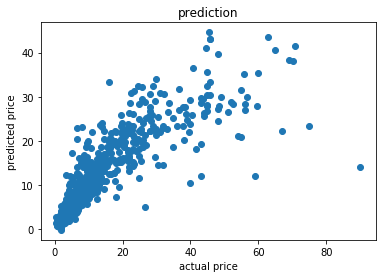

In [151]:
plt.scatter(y_test,y_pred_svm)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('prediction')
plt.show()

below using LinearRegression algorithm

In [152]:
clf2 = LinearRegression()
clf2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
accuracy = clf2.score(x_test, y_test)

In [154]:
print(accuracy)

0.7075120964935532


In [155]:
y_pred_lr=clf2.predict(x_test)

In [156]:
print ('R Squared =',r2_score(y_test, y_pred_lr))
print ('MAE =',mean_absolute_error(y_test, y_pred_lr))
print ('MSE =',mean_squared_error(y_test, y_pred_lr))

R Squared = 0.7075120964935532
MAE = 3.925031563503437
MSE = 38.38565137772281


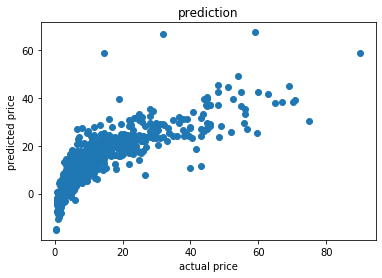

In [157]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('prediction')
plt.show()

below using RandomForestRegression

In [158]:
RandomForestRegModel=RandomForestRegressor()
RandomForestRegModel.fit(x_train,y_train)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [159]:
RandomForestRegModel.score(x_test,y_test)

0.8875510344195915

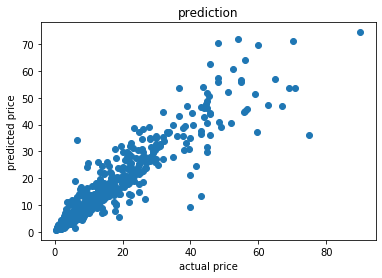

In [160]:
y_pred_rf=RandomForestRegModel.predict(x_test)
plt.scatter(y_test,y_pred_rf)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('prediction')
plt.show()                                   

In [161]:
print ('R Squared =',r2_score(y_test, y_pred_rf))
print ('MAE =',mean_absolute_error(y_test, y_pred_rf))
print ('MSE =',mean_squared_error(y_test, y_pred_rf))

R Squared = 0.8875510344195915
MAE = 1.786890019379845
MSE = 14.757624978018871


## Implementing the models on Test Data Set

In [121]:
cf = pd.read_excel('Data_test.xlsx')
cf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [122]:
cf.shape

(1234, 11)

In [85]:
print("Range of distance is from {} to {}, value is {}".format(cf['Kilometers_Driven'].min(),cf['Kilometers_Driven'].max(),cf['Kilometers_Driven'].max()-cf['Kilometers_Driven'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(cf['Kilometers_Driven'].max()-cf['Kilometers_Driven'].min())/10)
print("The median value of the score is ", np.median(cf['Kilometers_Driven']))

Range of distance is from 1000 to 350000, value is 349000
Bin is 10, so each bar corresponds to the value of: 34900.0
The median value of the score is  54572.5


In [86]:
cf.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [87]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaling=StandardScaler()
cf.Kilometers_Driven=scaling.fit_transform(cf[['Kilometers_Driven']])

In [124]:
cf.Kilometers_Driven.describe()

count    1.234000e+03
mean    -1.268119e-16
std      1.000405e+00
min     -1.616087e+00
25%     -6.887112e-01
50%     -1.105766e-01
75%      4.634831e-01
max      8.191616e+00
Name: Kilometers_Driven, dtype: float64

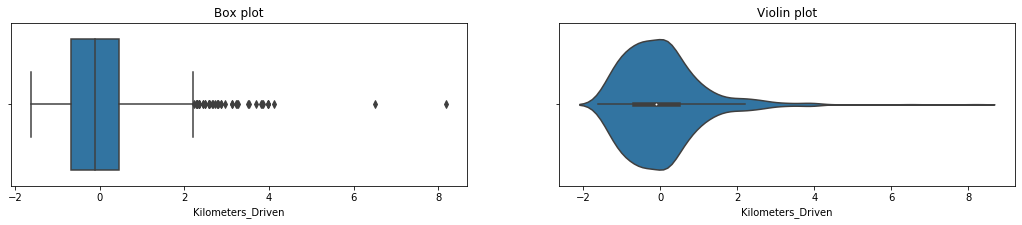

In [90]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(cf['Kilometers_Driven'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(cf['Kilometers_Driven'])
plt.title('Violin plot')
plt.show()

In [91]:
print("Range of distance is from {} to {}, value is {}".format(cf['Kilometers_Driven'].min(),cf['Kilometers_Driven'].max(),cf['Kilometers_Driven'].max()-cf['Kilometers_Driven'].min()))
print("Bin is 10, so each bar corresponds to the value of:",(cf['Kilometers_Driven'].max()-cf['Kilometers_Driven'].min())/10)
print("The median value of the score is ", np.median(cf['Kilometers_Driven']))

Range of distance is from -1.6160871167915627 to 8.191615846490846, value is 9.80770296328241
Bin is 10, so each bar corresponds to the value of: 0.980770296328241
The median value of the score is  -0.1105766096269585


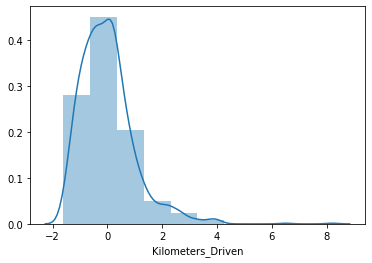

In [92]:
sns.distplot(cf['Kilometers_Driven'], bins=10, kde=True )

kilometersdriven<2 #to remove outliers

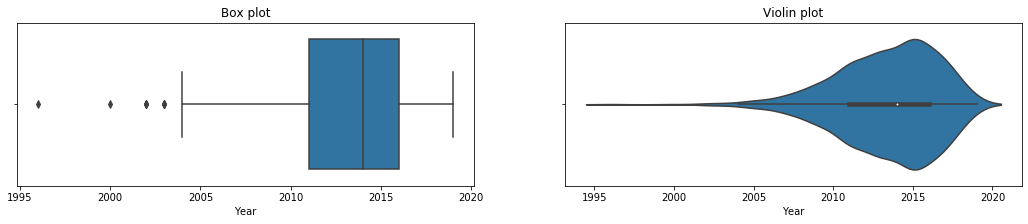

In [93]:
plt.figure(figsize=(18,3))
plt.subplot(1, 2, 1)
sns.boxplot(cf['Year'])
plt.title('Box plot')

plt.subplot(1, 2, 2)
sns.violinplot(cf['Year'])
plt.title('Violin plot')
plt.show()

year>2004 #to remove outliers

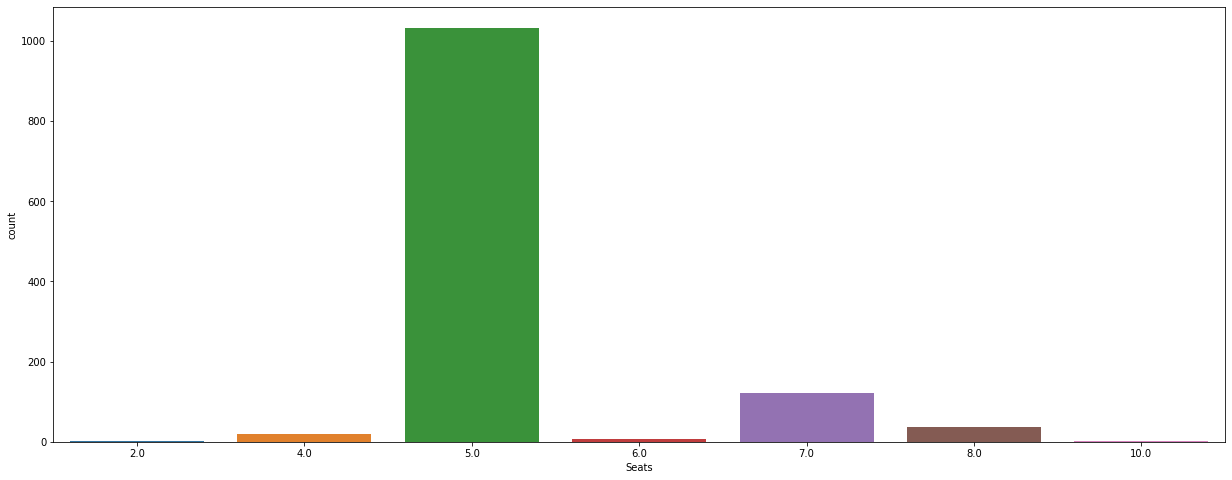

In [94]:
plt.figure(figsize=(21,8))
sns.countplot(cf['Seats'])
plt.show()

seats==5 #to remove outliers

In [125]:
man=np.mean(cf.Seats)

In [126]:
cf["Seats"].fillna(man,inplace=True)
cf.Seats.unique()
cf.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                 0
dtype: int64

In [127]:
cf['Power'] = cf['Power'].str.replace('[bhp]',' ')
cf['Engine'] = cf['Engine'].str.replace('[CC]',' ')
cf['Mileage'] = cf['Mileage'].str.replace('[kmpl,km/kg]',' ')
cf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,-0.493990,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,-0.112811,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,-0.688711,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,2.262030,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,-0.829223,Petrol,Manual,First,18.5,1197,82.85,5.0


In [128]:
cf["Engine"]=cf["Engine"].astype('float')
mean=cf.Engine.mean()
cf["Engine"].fillna(mean,inplace=True)
cf.Engine.isnull().sum()

0

In [129]:
cf["Mileage"]=cf["Mileage"].astype('float')
mean=cf.Mileage.mean()
cf["Mileage"].fillna(mean,inplace=True)
cf.Mileage.isnull().sum()

0

In [130]:
cf['Power'] = pd.to_numeric(cf['Power'], errors='coerce')

In [131]:
cf.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

In [132]:
mean=cf.Power.mean()
cf["Power"].fillna(mean,inplace=True)
cf.Mileage.isnull().sum()

0

Text(0.5, 1.0, 'Box plot')

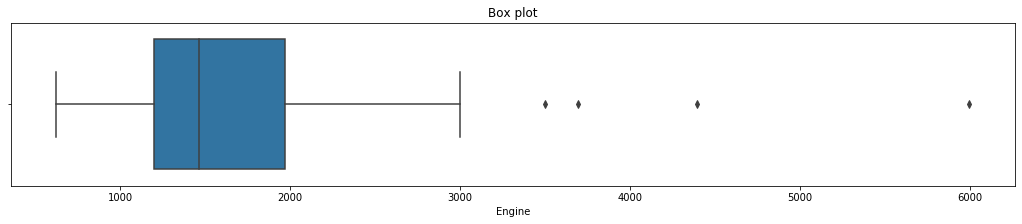

In [133]:
plt.figure(figsize=(18,3))
plt.subplot(1, 1, 1)
sns.boxplot(cf['Engine'])
plt.title('Box plot')

engine<3000 #to remove outliers

Text(0.5, 1.0, 'Box plot')

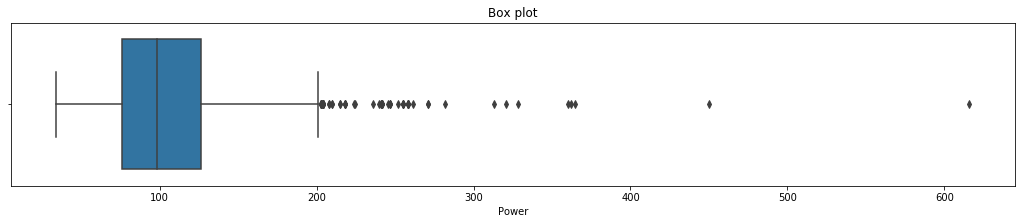

In [134]:
plt.figure(figsize=(18,3))
plt.subplot(1, 1, 1)
sns.boxplot(cf['Power'])
plt.title('Box plot')

power<200 #to remove outliers

Text(0.5, 1.0, 'Box plot')

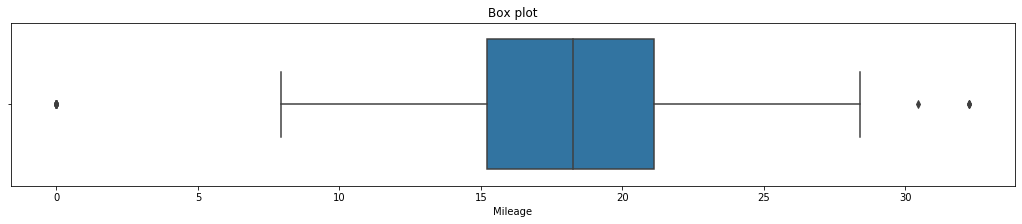

In [135]:
plt.figure(figsize=(18,3))
plt.subplot(1, 1, 1)
sns.boxplot(cf['Mileage'])
plt.title('Box plot')

Mileage<27 & >8  #to remove outliers

In [136]:
cf.replace(to_replace=['First','Second','Fourth & Above','Third'],value=['4','3','1','2'],inplace=True)
cf["Owner_Type"]=cf["Owner_Type"].astype('float')

cf.replace(to_replace=['Manual','Automatic'],value=['0','1'],inplace=True)
cf["Transmission"]=cf["Transmission"].astype('int')

In [137]:
dum_cf = pd.get_dummies(cf, columns=["Fuel_Type"], prefix=["Type_is"] )
dum_cf = pd.get_dummies(dum_cf, columns=["Location"], prefix=["Type_is"] )

In [138]:
cf_new=dum_cf
cf_new.shape

(1234, 24)

In [139]:
#this data is used to convert all the string variables to numerical and assigns numbers to particular name
def handle_non_numerical_data(cf_new):
    columns = cf_new.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if cf_new[column].dtype != np.int64 and cf_new[column].dtype != np.float64:
            column_contents = cf_new[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            cf_new[column] = list(map(convert_to_int, cf_new[column]))

    return cf_new

cf_new = handle_non_numerical_data(cf_new)
print(df.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010           0.145315   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015          -0.194369   
2                      Honda Jazz V     Chennai  2011          -0.139581   
3                 Maruti Ertiga VDI     Chennai  2012           0.309678   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013          -0.197985   

  Fuel_Type  Transmission  Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG             0         4.0    26.60   998.0   58.16    5.0   1.75  
1    Diesel             0         4.0    19.67  1582.0  126.20    5.0  12.50  
2    Petrol             0         4.0    18.20  1199.0   88.70    5.0   4.50  
3    Diesel             0         4.0    20.77  1248.0   88.76    7.0   6.00  
4    Diesel             1         3.0    15.20  1968.0  140.80    5.0  17.74  


In [173]:
x_testd=cf_new
x_testd

,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Type_is_CNG,...,Type_is_Bangalore,Type_is_Chennai,Type_is_Coimbatore,Type_is_Delhi,Type_is_Hyderabad,Type_is_Jaipur,Type_is_Kochi,Type_is_Kolkata,Type_is_Mumbai,Type_is_Pune
0,208,2014,-0.493990,0,4.0,32.26,998.0,58.20000,4.0,1,...,0,0,0,1,0,0,0,0,0,0
1,580,2013,-0.112811,0,3.0,24.70,796.0,47.30000,5.0,0,...,0,0,1,0,0,0,0,0,0,0
2,751,2017,-0.688711,0,4.0,13.68,2393.0,147.80000,7.0,0,...,0,0,0,0,0,0,0,0,1,0
3,140,2012,2.262030,0,4.0,23.59,1364.0,110.38042,5.0,0,...,0,0,0,0,1,0,0,0,0,0
4,404,2014,-0.829223,0,4.0,18.50,1197.0,82.85000,5.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,587,2011,0.868465,0,4.0,20.54,1598.0,103.60000,5.0,0,...,0,0,0,0,1,0,0,0,0,0
1230,330,2015,0.013846,1,4.0,17.21,1197.0,103.60000,5.0,0,...,0,0,0,0,0,0,0,0,1,0
1231,348,2012,-0.857325,0,4.0,23.08,1461.0,63.10000,5.0,0,...,0,0,0,0,0,0,0,1,0,0
1232,330,2013,-0.175507,1,2.0,17.20,1197.0,103.60000,5.0,0,...,0,0,0,0,0,0,0,0,0,1


In [176]:
#column added since it's missing in this data frame
x_testd['Type_is_Electric']=0

In [178]:
x_testd= preprocessing.scale(x_testd)

In [179]:
y_testd_pred_svm=clf.predict(x_testd)

In [180]:
#Values predicted for the test data by svm model
y_testd_pred_svm

array([ 6.54956346,  1.78567266, 14.81483909, ...,  4.13121745,
        5.01646857, 19.78340373])

In [185]:
y_testd_pred_lr=clf2.predict(x_testd)

In [186]:
#Values predicted for the test data by lr model
y_testd_pred_lr

array([-1.56693459e+14,  1.31427312e+14, -7.28104662e+13, ...,
       -7.20575483e+13,  1.32090037e+14, -7.28080068e+13])

In [187]:
y_testd_pred_rf=RandomForestRegModel.predict(x_testd)

In [184]:
#Values predicted for the test data by Random Forest model
y_testd_pred_rf

array([ 3.953,  2.303, 14.338, ...,  3.142,  3.976, 15.002])